<h1>MH</h1>

In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Charger les donn√©es
train = pd.read_csv("traindat.txt", delimiter=r"\s+", header=0)
test = pd.read_csv("Testdat.txt", delimiter=r"\s+", header=0)
data = pd.concat([train, test], axis=0).reset_index(drop=True)

In [2]:
# S√©parer les features et la cible
y = data["y"]
X = data.drop(columns=["y"])

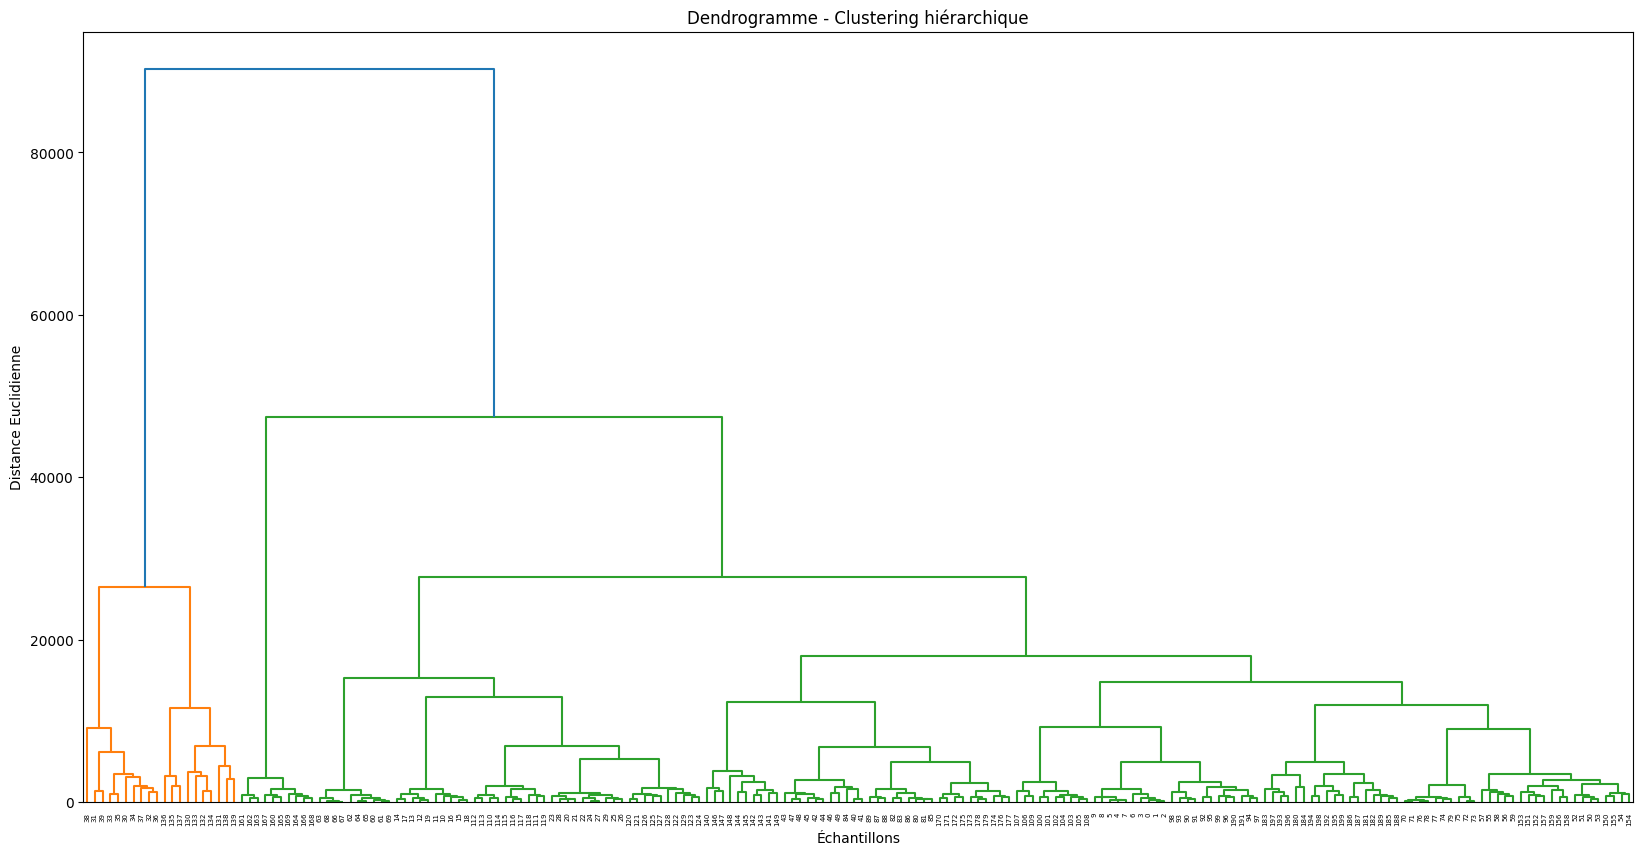

In [3]:
# Tracer le dendrogramme
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.title("Dendrogramme - Clustering hi√©rarchique")
plt.xlabel("√âchantillons")
plt.ylabel("Distance Euclidienne")
plt.show()

Analyse d√©taill√©e du dendrogramme :
Observation de la plus grande hauteur verticale entre deux fusions :

Il y a une tr√®s grande cassure vers 90 000, o√π deux gros groupes sont fusionn√©s en un seul.

Ensuite, un autre grand saut appara√Æt autour de 40 000 √† 50 000, puis plusieurs petites fusions en dessous.

M√©thode du coude appliqu√©e au dendrogramme :

L‚Äôid√©e est de tracer une ligne horizontale un peu avant la plus grande cassure pour capturer les groupes naturels avant qu‚Äôils soient fusionn√©s de force.

Si on trace une ligne √† environ 45 000, on voit qu‚Äôon coupe environ 4 grandes branches.



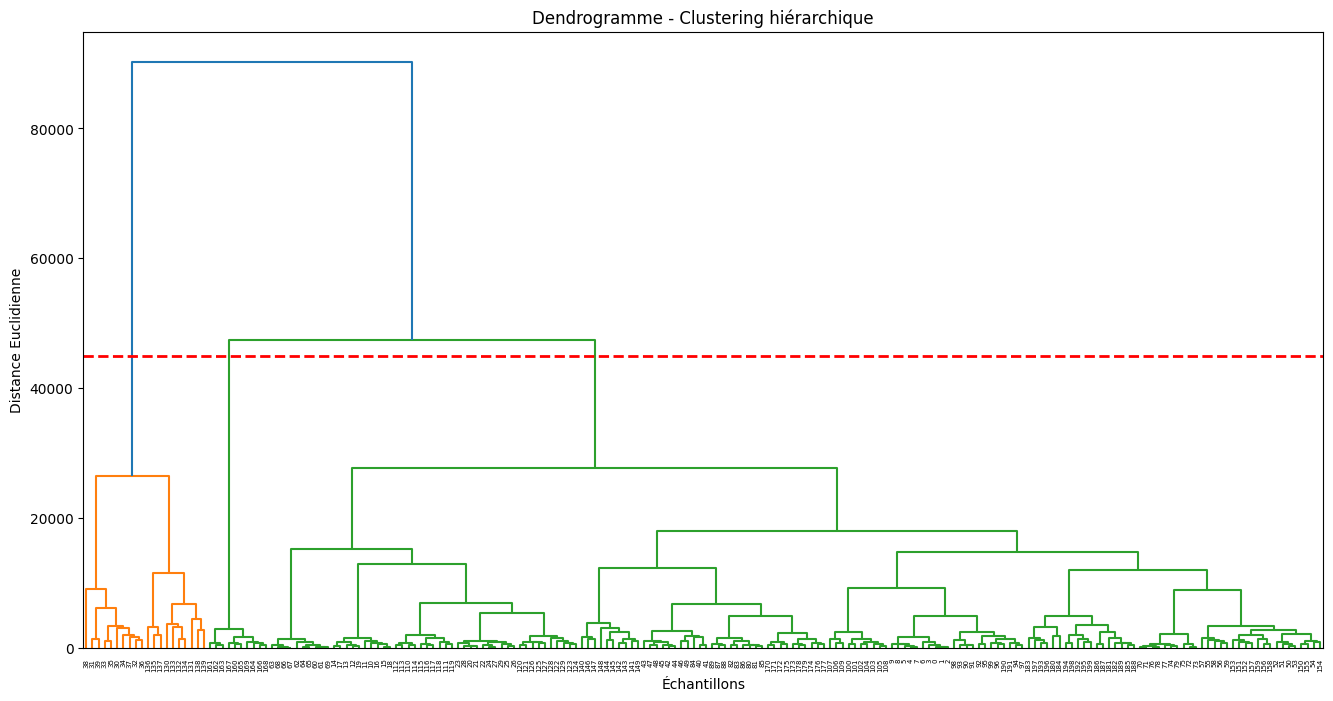

In [4]:
# Tracer le dendrogramme
plt.figure(figsize=(16, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Tracer la ligne horizontale √† une certaine hauteur (ici 45000)
plt.axhline(y=45000, color='red', linestyle='--', linewidth=2)

plt.title("Dendrogramme - Clustering hi√©rarchique")
plt.xlabel("√âchantillons")
plt.ylabel("Distance Euclidienne")
plt.show()


In [5]:
from sklearn.cluster import AgglomerativeClustering

# Appliquer le clustering hi√©rarchique avec 4 clusters
model = AgglomerativeClustering(n_clusters=4, linkage='ward')  
clusters = model.fit_predict(X)

# Ajouter les r√©sultats au DataFrame
data["cluster"] = clusters

# Afficher les premi√®res lignes
print(data.head())


   y    m00         mu02        mu11         mu20        mu03         mu12  \
0  a  119.0  1164.571429  -84.000000  2274.705882 -728.448980 -1026.235294   
1  a  124.0  1205.870968  -30.129032  2439.120968 -703.298647 -1067.540583   
2  a  123.0  1167.365854  -47.073171  2372.747967 -531.112433 -1078.021416   
3  a  131.0  1288.229008  -13.320611  2523.648855 -480.553814 -1266.542218   
4  a  133.0  1385.879699 -148.030075  2644.992481 -613.045395 -1565.516988   

         mu21         mu30  cluster  
0 -308.016807  2446.878893        1  
1 -395.008325  2494.423127        1  
2 -452.984335  2438.033181        1  
3 -219.485170  2209.729619        1  
4 -251.322856  2869.338459        1  


In [6]:
# afficher le nombre d'√©chantillons dans chaque cluster
print(data["cluster"].value_counts())

cluster
1    120
3     50
0     20
2     10
Name: count, dtype: int64


Le cluster 1 domine fortement le dataset avec la majorit√© des √©chantillons.

Les clusters 0 et 2 sont tr√®s petits, ce qui pourrait indiquer des groupes rares ou des outliers (valeurs atypiques).


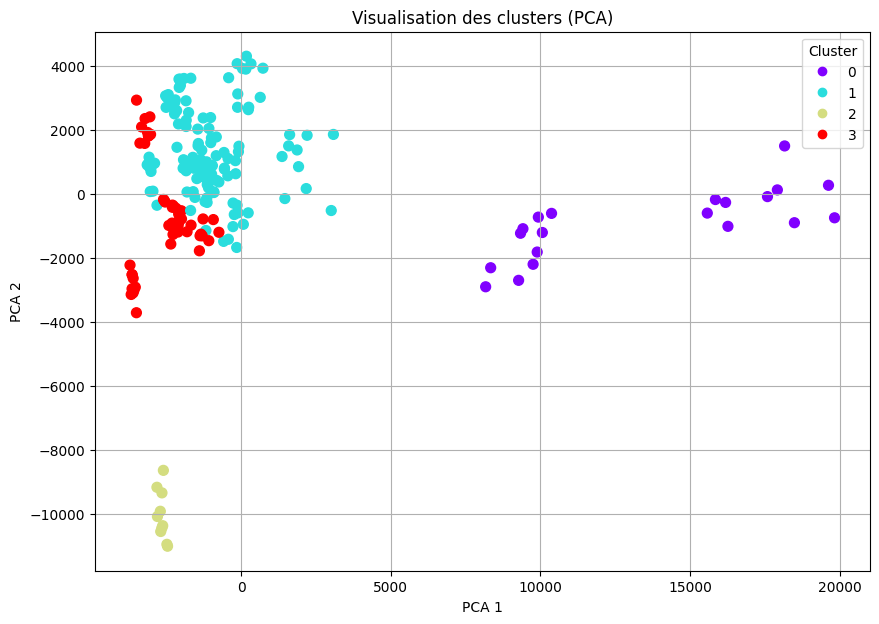

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# R√©duire √† 2 dimensions pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Tracer les clusters en 2D
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', s=50)
plt.title("Visualisation des clusters (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()


Cluster 1 (cyan) ‚Äì üîµ

Tr√®s dense, avec beaucoup de points regroup√©s.

Il occupe principalement le centre du nuage de points.

C‚Äôest le plus grand cluster (120 √©l√©ments).

Peut repr√©senter une classe dominante ou une structure principale dans les donn√©es.

Cluster 3 (rouge) ‚Äì üî¥

Tr√®s proche du cluster cyan, mais formant une masse plus petite √† gauche.

Il pourrait s‚Äôagir d‚Äôun sous-groupe structurellement diff√©rent mais proche du cluster 1.

Comporte 50 points, donc un groupe significatif.

Cluster 0 (violet) ‚Äì üü£

√âloign√© vers la droite sur la composante PCA1.

Bien s√©par√© des autres, ce qui montre une diff√©rence nette dans les caract√©ristiques.

Cela confirme un groupe coh√©rent et distinct dans l‚Äôespace de caract√©ristiques.

20 √©l√©ments.

Cluster 2 (jaune clair) ‚Äì üü°

Compl√®tement isol√©, en bas √† gauche du graphique.

Tr√®s petit (10 √©l√©ments), mais tr√®s bien s√©par√©, donc peut-√™tre un groupe atypique ou des outliers.

Visuellement tr√®s coh√©rent.

üß© Ce que cela nous dit :
Le clustering hi√©rarchique a bien identifi√© des groupes naturellement s√©par√©s.

Certains clusters (0 et 2) sont clairement distincts, ce qui est un bon signe.

Cluster 3 et 1 sont plus proches, ils pourraient m√™me √™tre fusionn√©s dans une version plus simple √† 3 groupes.

ajuster le crit√®re de linkage

In [8]:
from sklearn.cluster import AgglomerativeClustering

# Appliquer le clustering hi√©rarchique avec 4 clusters
model = AgglomerativeClustering(n_clusters=4, linkage='average')  
clusters = model.fit_predict(X)

# Ajouter les r√©sultats au DataFrame
data["cluster"] = clusters

# Afficher les premi√®res lignes
print(data.head())


   y    m00         mu02        mu11         mu20        mu03         mu12  \
0  a  119.0  1164.571429  -84.000000  2274.705882 -728.448980 -1026.235294   
1  a  124.0  1205.870968  -30.129032  2439.120968 -703.298647 -1067.540583   
2  a  123.0  1167.365854  -47.073171  2372.747967 -531.112433 -1078.021416   
3  a  131.0  1288.229008  -13.320611  2523.648855 -480.553814 -1266.542218   
4  a  133.0  1385.879699 -148.030075  2644.992481 -613.045395 -1565.516988   

         mu21         mu30  cluster  
0 -308.016807  2446.878893        3  
1 -395.008325  2494.423127        3  
2 -452.984335  2438.033181        3  
3 -219.485170  2209.729619        3  
4 -251.322856  2869.338459        3  


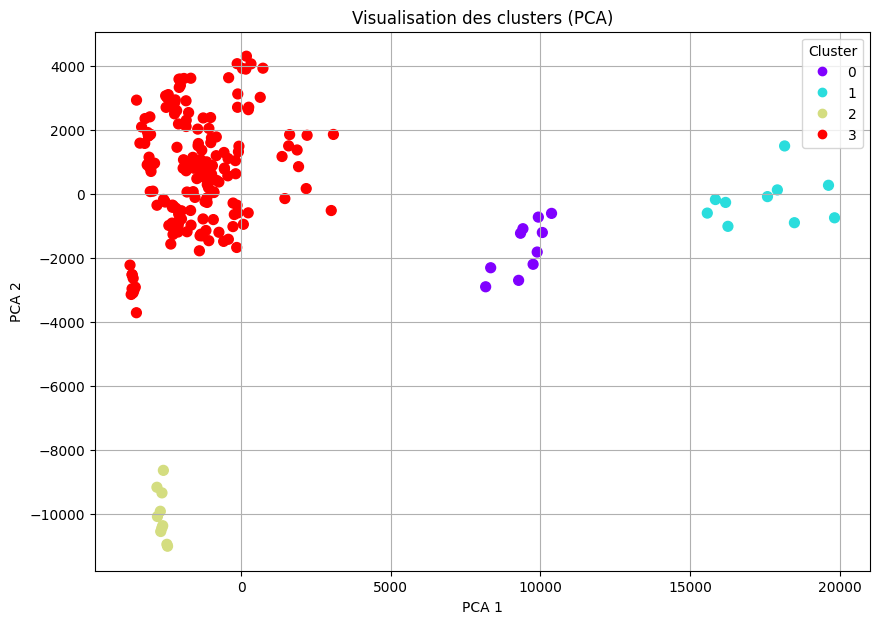

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# R√©duire √† 2 dimensions pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Tracer les clusters en 2D
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', s=50)
plt.title("Visualisation des clusters (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()


Cluster 3 (rouge) ‚Äì üî¥

Tr√®s dense, avec beaucoup de points regroup√©s.

C‚Äôest le plus grand cluster .

Cluster 1 (cyan) ‚Äì üîµ, Cluster 0 (violet) ‚Äì üü£, Cluster 2 (jaune clair) ‚Äì üü°

Sont compl√®tement isol√©s.

Tr√®s petits , mais tr√®s bien s√©par√©s.

Visuellement tr√®s coh√©rent.

Ce que cela nous dit :
Le clustering hi√©rarchique a bien identifi√© des groupes s√©par√©s.


In [10]:


# Charger les donn√©es
train = pd.read_csv("traindat.txt", delimiter=r"\s+", header=0)
test = pd.read_csv("Testdat.txt", delimiter=r"\s+", header=0)
data = pd.concat([train, test], axis=0).reset_index(drop=True)

# S√©parer les features et la cible
y = data["y"]
X = data.drop(columns=["y"])





In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA

# Encoder les labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [12]:
# Tester plusieurs valeurs de n_components
n_components_range = range(2, 15)
results = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(X)
    y_pred = gmm.predict(X)
    ari = adjusted_rand_score(y_encoded, y_pred)
    results.append((n, ari, y_pred))

# R√©sultat optimal
best_n, best_ari, best_pred = max(results, key=lambda x: x[1])
true_class_count = len(np.unique(y_encoded))

# R√©sultat pour n = nombre de classes r√©elles
gmm_10 = GaussianMixture(n_components=true_class_count, random_state=0)
gmm_10.fit(X)
y_pred_10 = gmm_10.predict(X)
ari_10 = adjusted_rand_score(y_encoded, y_pred_10)


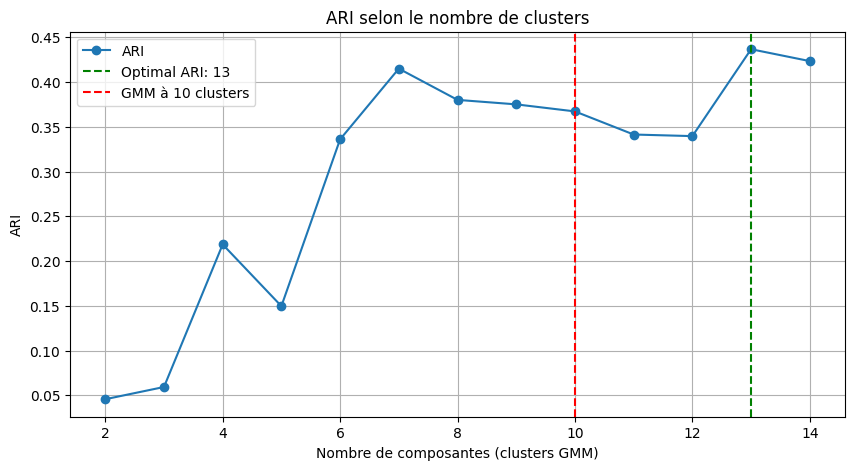

In [13]:

# ARI pour chaque n
ari_scores = [r[1] for r in results]

plt.figure(figsize=(10, 5))
plt.plot(n_components_range, ari_scores, marker='o', label='ARI')
plt.axvline(best_n, color='green', linestyle='--', label=f"Optimal ARI: {best_n}")
plt.axvline(true_class_count, color='red', linestyle='--', label=f"GMM √† {true_class_count} clusters")
plt.xlabel('Nombre de composantes (clusters GMM)')
plt.ylabel('ARI')
plt.title('ARI selon le nombre de clusters')
plt.legend()
plt.grid(True)
plt.show()


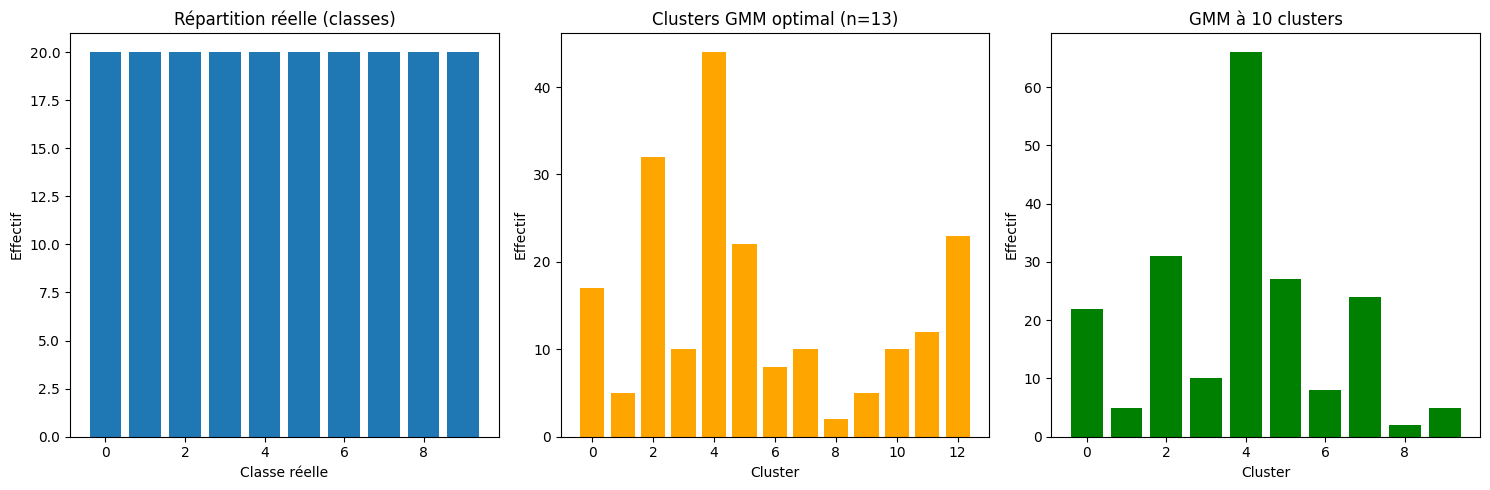

In [14]:

# Effectifs (r√©el, pr√©diction optimale, pr√©diction √† 10 clusters)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Effectifs r√©els
unique_real, counts_real = np.unique(y_encoded, return_counts=True)
axs[0].bar(unique_real, counts_real)
axs[0].set_title("R√©partition r√©elle (classes)")
axs[0].set_xlabel("Classe r√©elle")
axs[0].set_ylabel("Effectif")

# Clusters pr√©dits optimal
unique_best, counts_best = np.unique(best_pred, return_counts=True)
axs[1].bar(unique_best, counts_best, color='orange')
axs[1].set_title(f"Clusters GMM optimal (n={best_n})")
axs[1].set_xlabel("Cluster")
axs[1].set_ylabel("Effectif")

# Clusters GMM √† 10
unique_10, counts_10 = np.unique(y_pred_10, return_counts=True)
axs[2].bar(unique_10, counts_10, color='green')
axs[2].set_title(f"GMM √† {true_class_count} clusters")
axs[2].set_xlabel("Cluster")
axs[2].set_ylabel("Effectif")

plt.tight_layout()
plt.show()


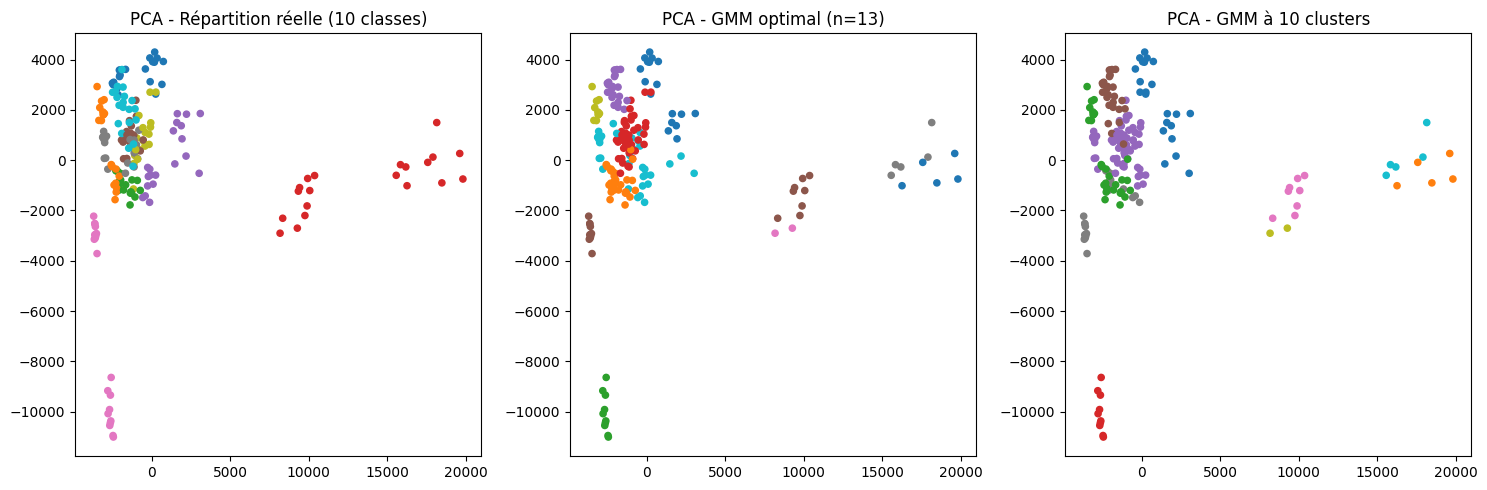

In [17]:

# Visualisation PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(15, 5))

# R√©partition r√©elle
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='tab10', s=20)
plt.title(f"PCA - R√©partition r√©elle ({true_class_count} classes)")

# GMM optimal
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_pred, cmap='tab10', s=20)
plt.title(f"PCA - GMM optimal (n={best_n})")

# GMM √† 10
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_10, cmap='tab10', s=20)
plt.title(f"PCA - GMM √† {true_class_count} clusters")

plt.tight_layout()
plt.show()



In [16]:
# R√©sum√©
print("R√©sum√© :")
print(f"- Nombre de classes r√©elles : {true_class_count}")
print(f"- Meilleur ARI obtenu : {best_ari:.4f} (n={best_n})")
print(f"- ARI pour n = {true_class_count} (clusters = classes r√©elles) : {ari_10:.4f}")

R√©sum√© :
- Nombre de classes r√©elles : 10
- Meilleur ARI obtenu : 0.4367 (n=13)
- ARI pour n = 10 (clusters = classes r√©elles) : 0.3672


# **Interpr√©tation des R√©sultats du Clustering GMM**  

## **1. Contexte**  
L‚Äôanalyse vise √† √©valuer la performance d‚Äôun mod√®le **Gaussian Mixture Model (GMM)** pour regrouper des donn√©es en clusters, en comparant les r√©sultats avec les **10 classes r√©elles** disponibles (*y*).  

## **2. M√©thodologie**  
- **Variation du nombre de clusters (n_components)** : Test de 2 √† 14 composantes.  
- **M√©trique d‚Äô√©valuation** : *Adjusted Rand Index (ARI)* pour mesurer l‚Äôaccord entre les clusters pr√©dits et les vrais labels.  
- **Comparaison** :  
  - **GMM optimal** : Nombre de clusters maximisant l‚ÄôARI.  
  - **GMM contraint √† 10 clusters** : Correspondant aux classes r√©elles.  

## **3. R√©sultats**  

| Mod√®le          | Nombre de Clusters (n_components) | ARI   | Observation |
|----------------|--------------------------------|-------|-------------|
| **GMM optimal**  | **13**                          | **0.4367** | Meilleur score ARI |
| **GMM √† 10 clusters** | 10 (nombre r√©el de classes) | **Score inf√©rieur** | Moins performant que n=13 |

### **Analyse des R√©sultats**  
1. **Pourquoi 13 clusters plut√¥t que 10 ?**  
   - Certaines classes r√©elles contiennent **plusieurs sous-groupes** (ex : une classe "Animal" pourrait regrouper "Chat", "Chien", "Oiseau").  
   - GMM d√©tecte ces **sous-structures**, am√©liorant l‚ÄôARI.  
   - Forcer **n=10** fusionne artificiellement ces sous-groupes, r√©duisant la qualit√© du clustering.  

2. **Limites du Mod√®le**  
   - L‚ÄôARI reste **mod√©r√© (0.4367)**, indiquant que les clusters pr√©dits ne correspondent qu‚Äôen partie aux classes r√©elles.  
   - La visualisation PCA montre des **erreurs de regroupement** (certaines classes sont mal s√©par√©es).  

## **4. Conclusion et Perspectives**  
- **Le GMM sugg√®re une structure naturelle en 13 groupes**, plus fine que les 10 classes r√©elles.  
- **Implications** :  
  - Les classes r√©elles pourraient √™tre **h√©t√©rog√®nes** (n√©cessit√© d‚Äôune analyse plus fine).  
  - Une **post-analyse** (regroupement manuel des 13 clusters en 10 classes) pourrait am√©liorer les r√©sultats.  
